In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt 
import matplotlib.image as img

ori_img = img.imread('./girl.jpg')
print(ori_img.shape)


(429, 640, 3)


In [2]:
#convolution  = conv  >> API 로 연산하자 
# API는 4차원을 입력을 받는다.  (이미지 개수, 세로, 가로, 채널)
# 이미지 SHAPE 의 값을 (429, 640, 3) =>> (1, 429, 640, 3) 변경해준다 

input_img = ori_img.reshape((1,)+ori_img.shape) #투플끼리의 합이어서 
input_img = input_img.astype(np.float32) #현재의 정수값을 =>tf에서 float 처리하기때문에 타입변경 필요 
print(input_img.shape)


(1, 429, 640, 3)


In [3]:
#사이즈(데이터)를 줄여서 처리 좀더 간단하게 하려고  RGB 중 한 채널만 갖고 온다 
ch1_input_img = input_img[:,:,:,0:1] 
#ch1_imput_img = input_img[:,:,:,0] 이걸로 shape을 확인해보면, (1,429,640) 나옴 
print(ch1_input_img.shape)

(1, 429, 640, 1)


In [4]:
#필터를 만들자 
filter =np.array([
    [[[1]],[[0]],[[1]]],
    [[[1]],[[0]],[[1]]],
    [[[1]],[[0]],[[1]]]
                ] )
print(filter.shape)


(3, 3, 1, 1)


In [5]:
conv2d = tf.nn.conv2d(
    ch1_input_img, 
    filter,
    strides=[1,1,1,1], #4차원의 4개를 처리해줘야 
    padding='VALID', #패딩을 고려하지 않는다 
)

conv2d_result = conv2d.numpy()
print(conv2d_result.shape)


(1, 427, 638, 1)


covolution 이전 값 
(1, 429, 640, 1)

convolution 이후 값 
(1, 427, 638, 1)

In [6]:
t_img1 = conv2d_result[0,:,:,:]



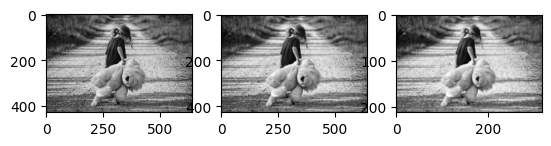

In [7]:
#풀링을 해보자 
#가장 특징이 두드런진 거를 뽑아서 maxpool 

pool = tf.nn.max_pool(
    conv2d_result,
    ksize=[1,3,3,1], #3x3을 넣어주는 것이 목적 
    strides=[1,2,2,1],
    padding='VALID'
)

pool_result = pool.numpy()
#차원이 4개니까 바꿔줘야 함. 
t_img2 = pool_result[0,:,:,:] #첫번째꺼는 안 가져옴 

#이미지 띄우기 
fig = plt.figure()
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
ax1.imshow(ori_img)
ax2.imshow(t_img1,cmap='gray') #우리 데이터는 ..... 
ax3.imshow(t_img2,cmap='gray')



Found 2004 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
(20, 150, 150, 3)
(20,)
[0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


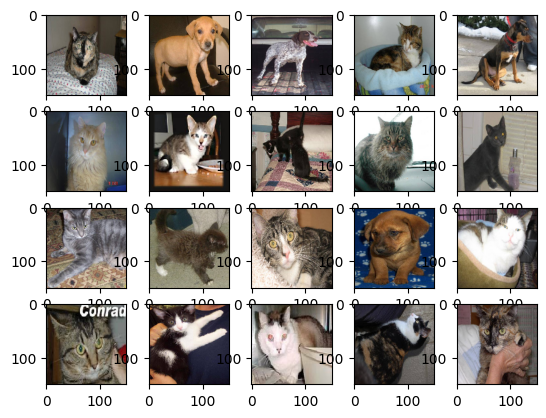

In [24]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt 

#이미지 디렉토리 위치 저장
train_dir='../cat_dog_small/train'
validation_dir='../cat_dog_small/validation'

#데이터 생성 
train_datagen = ImageDataGenerator(rescale=1/255) #이미지의 색상은 0~255이니까 255로 나누면, 0~1까지 정규화가됨.  
validation_datagen = ImageDataGenerator(rescale=1/255) #정규화는 신경망을 훈련할 때 성능을 높임 

#설정 
train_generator = train_datagen.flow_from_directory(
    train_dir, #이미지파일이 저장된 디렉토리
    classes=['cats','dogs'], #클래스 지정: 타겟, 레이블
    target_size=(150,150),  #이미지 사이즈 150x150 사이즈로 일반화 시킴 
    batch_size = 20, #한번에,데이터묶음, 몇개 사이즈를 갖고 올 것인가 
    class_mode = 'binary', #0 아니면 1 개아니면 고양이를 구별하는 거라 
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    classes=['cats','dogs'], #클래스 지정: 타겟, 레이블
    target_size=(150,150),  
    batch_size = 20, #한번에 몇개 사이즈를 갖고 올 것인가 
    class_mode = 'binary', #0 아니면 1 개아니면 고양이를 구별하는 거라 
)

#한번에 20개 이미지 가져와서 

fig1 = plt.figure()
axs = []
for i in range(20):
    axs.append(fig1.add_subplot(4,5,i+1))

for data_batch,label_batch in train_generator: 
    print(data_batch.shape)

    for idx, img_data in enumerate(data_batch):
        axs[idx].imshow(img_data)
    
    print(label_batch.shape)
    print(label_batch) 
    break


1. Found 2004 images belonging to 2 classes. >> (training data)
2. Found 1000 images belonging to 2 classes. >> (validation data)
3. (20, 150, 150, 3) >> 150X150(3:RGB)이미지가 20개(ROW)형태의 어레이가 생성됨  
하나의 DATA BATCH는 batch size가 20개씩이니까, 150x150(3:RGB) 가 20개의 행;  
20개의 이미지 데이터을 모두 담은  배열이생성됨. 

4. (20,) >> DATA BATCH안의 하나의 이미지 당 하나의 라벨이 생성이 됨. 

5. [0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
>> CATS = 0, DOGS = 1 

In [26]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten,Dense
from tensorflow.keras.optimizers import Adam

#1. model 생성 
model = Sequential()

#2. 모델에 레이어 추가 

####1

model.add(Conv2D(
    filters = 32, # 32개의 필터를 적용한다 
    kernel_size=(3,3),#내부적으로 랜덤하게 만들어서 
    strides = (1,1),
    padding ='valid',
    activation = 'relu',
    input_shape=(150,150,3)
))

model.add(MaxPooling2D(
    pool_size =(2,2)    
))

####2
model.add(Conv2D(
    filters = 64, #컴퓨터 사양이 증가하면, 512까지 올릴 수 있음 
    kernel_size=(3,3),
    strides = (1,1),
    padding ='valid',
    activation = 'relu',
    #input_shape=(150,150,3) 1번 conv 할 때만 넣어주면 됨. 
))

model.add(MaxPooling2D(
    pool_size =(2,2)    
))

####3
model.add(Conv2D(
    filters = 128, #컴퓨터 사양이 증가하면, 512까지 올릴 수 있음 
    kernel_size=(3,3),
    strides = (1,1),
    padding ='valid',
    activation = 'relu',
    #input_shape=(150,150,3) 1번 conv 할 때만 넣어주면 됨. 
))

model.add(MaxPooling2D(
    pool_size =(2,2)    
))

####4
model.add(Conv2D(
    filters = 256, #컴퓨터 사양이 증가하면, 512까지 올릴 수 있음 
    kernel_size=(3,3),
    strides = (1,1),
    padding ='valid',
    activation = 'relu',
    #input_shape=(150,150,3) 1번 conv 할 때만 넣어주면 됨. 
))

model.add(MaxPooling2D(
    pool_size =(2,2)    
))

####5
model.add(Conv2D(
    filters = 512, #컴퓨터 사양이 증가하면, 512까지 올릴 수 있음 
    kernel_size=(3,3),
    strides = (1,1),
    padding ='valid',
    activation = 'relu',
    #input_shape=(150,150,3) 1번 conv 할 때만 넣어주면 됨. 
))

model.add(MaxPooling2D(
    pool_size =(2,2)    
))

model.add(Flatten())
model.add(Dense(
    units=1,
    activation='sigmoid'
    
))

model.summary()
model.compile(
    optimizer= Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics =['acc']
)

model.fit(
    train_generator,
    steps_per_epoch = 100,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = 50, #1000개 이미지니까, 20개씩 하면 
    verbose =1, #하면서 이게 없으면 30분 한시간동안 화면이 멈춰져 있음. 중간중간 메세지를 알려줌. 
)


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 17, 17, 128)     